<a href="https://colab.research.google.com/github/AndreHidayatullah/DAA/blob/main/DAA9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Adjacency Matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

In [2]:
# NUmber of iterations
num_iterations = 100

for i in range(num_iterations):
  new_page_rank = np.zeros(num_pages)
  for j in range(num_pages):
    # Calculate the PageRank contribution from each linking page
    linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
    for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
    new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
  page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.198
PR(Page 2) = 0.307
PR(Page 3) = 0.357
PR(Page 4) = 0.139


In [3]:
# Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                            [0, 0, 1, 0],
                            [0, 1, 0, 1],
                            [1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

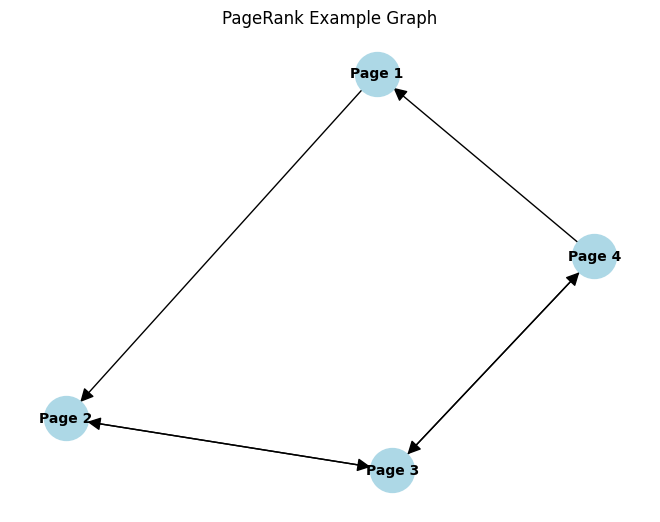

In [4]:
# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i,j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels = True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
myWeb = nx.DiGraph()
myPages = range(1,5)

In [7]:
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

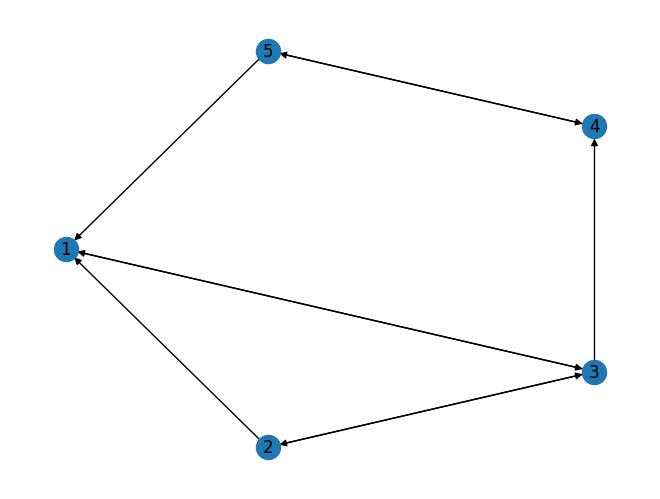

In [8]:
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows = True, with_labels = True)
plt.show()

In [9]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph) # Menggunakan metode to numpy_array
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(1.0/outwards)
  G = np.multiply(M, prob_outwards[:, np.newaxis])

  p = np.ones(nodes_set) / float(nodes_set)
  return G, p

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1,3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [10]:
G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [11]:
import numpy as np

# Matrix adjacency (0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 1],
                             [0, 0, 1, 1, 0]])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype = float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype = float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      if adjacency_matrix[i, j] == 1:
        # Hitung jumlah tautan keluar dari halaman i
        num_outlinks = np.sum(adjacency_matrix[i, :])
        if num_outlinks > 0:
          new_pagerank[j] += pagerank[i] / num_outlinks

  # Apply damping factor and add the random jump probability
  new_pagerank = damping_factor * new_pagerank + (1 - damping_factor) / len(pagerank)

  # Normalisasi PageRank (optional, but good for clarity)
  # new_pagerank /= np.sum(new_pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[0.30514109 0.11645665 0.32369538 0.15768928 0.09701795]


In [12]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vector of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vector of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

In [13]:
for iteration in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  # Terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


=== HASIL PAGERANK (100 iterasi, d=0.85) ===
D: 0.220769
C: 0.206725
F: 0.159946
E: 0.158760
B: 0.140942
A: 0.112858


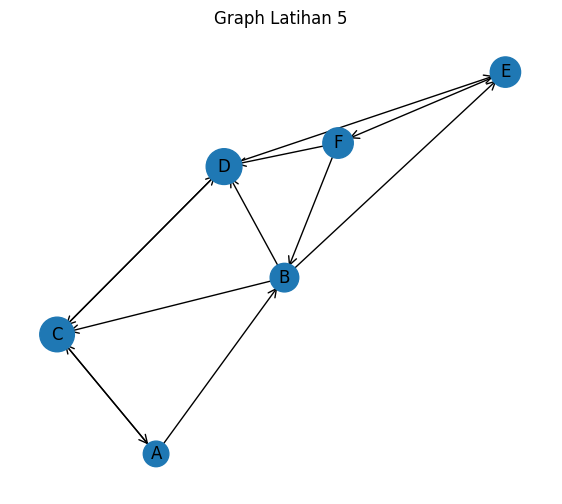

In [14]:
# Latihan 5
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

edges = [
    ("A","B"), ("A","C"),
    ("B","C"), ("B","D"), ("B","E"),
    ("C","A"), ("C","D"),
    ("D","C"), ("D","E"),
    ("E","F"),
    ("F","B"), ("F","D")
]

G = nx.DiGraph()
G.add_edges_from(edges)

nodes = list(G.nodes())
n = len(nodes)
idx = {nodes[i]: i for i in range(n)}

out_counts = np.zeros(n, dtype=float)
for u in nodes:
    out_counts[idx[u]] = G.out_degree(u)

d = 0.85
pr = np.ones(n) / n

incoming = {u: list(G.predecessors(u)) for u in nodes}

def iterate_pagerank(pr, iterations=100):
    N = len(pr)
    for _ in range(iterations):
        new_pr = np.zeros_like(pr)
        for i, node in enumerate(nodes):
            new_pr[i] = (1 - d) / N
            s = 0.0
            for pred in incoming[node]:
                j = idx[pred]
                if out_counts[j] == 0:
                    s += pr[j] / N
                else:
                    s += pr[j] / out_counts[j]
            new_pr[i] += d * s
        new_pr = new_pr / new_pr.sum()
        pr = new_pr
    return pr

final_pr = iterate_pagerank(pr, iterations=100)

print("=== HASIL PAGERANK (100 iterasi, d=0.85) ===")
for node, val in sorted(zip(nodes, final_pr), key=lambda x: -x[1]):
    print(f"{node}: {val:.6f}")

df = pd.DataFrame({
    "Node": nodes,
    "PageRank": final_pr,
    "Outlinks": [int(out_counts[idx[n]]) for n in nodes],
    "Inlinks": [G.in_degree(n) for n in nodes]
}).sort_values(by="PageRank", ascending=False).reset_index(drop=True)

df

plt.figure(figsize=(7,6))
pos = nx.spring_layout(G, seed=42)
sizes = (final_pr * 3000).tolist()
nx.draw_networkx_nodes(G, pos, node_size=sizes)
nx.draw_networkx_edges(G, pos, arrowsize=15, arrowstyle='->')
nx.draw_networkx_labels(G, pos)
plt.title("Graph Latihan 5")
plt.axis('off')
plt.show()